In [4]:
import json
import re
prompt_file_path = 'dataset/T2IS/prompt.json'

In [2]:
def extract_grid_info(prompt) -> tuple[int, int]:
    # Grid can be represented as int x int, or int ⨉ int. ⨉ has unicode \u2a09
    match = re.findall(r'(\d+)\s*[x⨉]\s*(\d+)', prompt)
    if len(match) == 0:
        return (1, 1)

    return (int(match[0][0]), int(match[0][1]))

In [5]:
data = json.load(open(prompt_file_path))

In [12]:
task_cases = {}
for d in data:
    task_name = '_'.join(d['task_name_case_id'].split('_')[:-1])
    if task_name not in task_cases:
        task_cases[task_name] = []
    task_cases[task_name].append(d)


In [6]:
# Group data by its grid form
groups = {}
for item in data:
    grid_info = extract_grid_info(item['prompt'])
    if grid_info not in groups:
        groups[grid_info] = []
    
    groups[grid_info].append(item)


In [7]:
{k: len(v) for k, v in groups.items()}

{(1, 3): 112,
 (2, 2): 285,
 (1, 5): 116,
 (2, 3): 68,
 (1, 2): 7,
 (1, 7): 5,
 (2, 4): 3}

In [8]:
square_2x2 = groups[(2,2)]

In [9]:
import random
# Set seed for sampling
random.seed(42)

# Split the data into train and test sets
test_data = random.sample(square_2x2, 64)
train_data = [item for item in square_2x2 if item not in test_data]

In [23]:
train_dist = {k: len([v for v in task_cases[k] if v in train_data]) for k in task_cases}
test_dist = {k: len([v for v in task_cases[k] if v in test_data]) for k in task_cases}

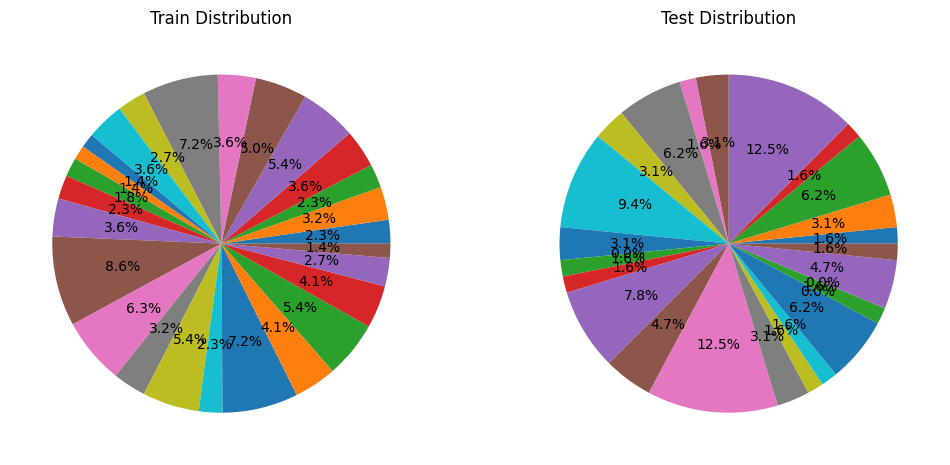

In [25]:
import matplotlib.pyplot as plt
# plot the distribution with pie chart
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.pie(train_dist.values(), autopct='%1.1f%%')
plt.title('Train Distribution')
plt.subplot(1, 2, 2)
plt.pie(test_dist.values(), autopct='%1.1f%%')
plt.title('Test Distribution')
plt.show()

In [26]:
with open('dataset/T2IS/train_metadata.jsonl', 'w') as f:
    for item in train_data:
        f.write(json.dumps(item) + '\n')

with open('dataset/T2IS/test_metadata.jsonl', 'w') as f:
    for item in test_data:
        f.write(json.dumps(item) + '\n')